<a href="https://colab.research.google.com/github/nitya1195/Aryan_1234/blob/main/second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RASTER DATA PROCESSING USING PYTHON**

**Raster Data**-it represents objects/variables on the earth surface as matrix of values ,in the form of pixles,cells,or grids.

**Layers and Brands**

A Raster is an image with a matrix values representing the values of some observed attribute .Bands of a raster correspond to different variables usually using same matrix namture.

Example - Spatial variability ,elevation,rainfall over a reagion,

image resource==https://gisgeography.com/spatial-data-types-vector-raster/

**Raster Bands**

some raster have a single band of data while others have multiple bands.
Basically represented by a single matrix of cell values

Example of single band raster data is "Digital Elevation Model"(DEM)(each cell in DEM represents surface elevation



**GDAL**-GDAL is Geospacial Data Abstraction Library is a translator library for raster and vector geospacial data formates

It is free and opensource (https://github.com/OSGeo/gdal).

It supports 80+ image formates and map projections.

In [ ]:
#using GDAL Library

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from osgeo import gdal
import pprint                 # for printing in  a readable text formate

In [ ]:
import os
os.chdir('/content/drive/MyDrive')                        #chdir is for changing directory

In [ ]:
out_put = gdal.Info('images.tif',format='json')

In [ ]:
pprint.pprint(out_put)

{'bands': [{'band': 1,
            'block': [225, 1],
            'colorInterpretation': 'Red',
            'metadata': {'IMAGE_STRUCTURE': {'COMPRESSION': 'JPEG'}},
            'type': 'Byte'},
           {'band': 2,
            'block': [225, 1],
            'colorInterpretation': 'Green',
            'metadata': {'IMAGE_STRUCTURE': {'COMPRESSION': 'JPEG'}},
            'type': 'Byte'},
           {'band': 3,
            'block': [225, 1],
            'colorInterpretation': 'Blue',
            'metadata': {'IMAGE_STRUCTURE': {'COMPRESSION': 'JPEG'}},
            'type': 'Byte'}],
 'cornerCoordinates': {'center': [112.5, 112.5],
                       'lowerLeft': [0.0, 225.0],
                       'lowerRight': [225.0, 225.0],
                       'upperLeft': [0.0, 0.0],
                       'upperRight': [225.0, 0.0]},
 'description': 'images.tif',
 'driverLongName': 'JPEG JFIF',
 'driverShortName': 'JPEG',
 'extent': {'coordinates': [[]], 'type': 'Polygon'},
 'files': ['imag

**GETTING RASTER INFORMATION WITH PYTHON**

In [21]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
#import os
import math

In [22]:
file_name='HV_2021_rabi.tif'

In [23]:
ds=gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x78b2d56139f0> >

In [24]:
print('File list:',ds.GetFileList())

File list: ['HV_2021_rabi.tif']


In [25]:
print('Width :',ds.RasterXSize)

Width : 10980


In [26]:
print('Hight :',ds.RasterYSize)

Hight : 11374


In [27]:
print('Coordinate system:',ds.GetProjection())

Coordinate system: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [28]:
gt=ds.GetGeoTransform()
gt

(77.818422008,
 9.573294890710422e-05,
 0.0,
 18.068262213,
 0.0,
 -8.864183312818709e-05)

In [37]:
#for getting realworld four corners of image

print('Upper Left Corner:',gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:',gdal.ApplyGeoTransform(gt,ds.RasterYSize,0))
#print('Lower Right Corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.Raster))
print('Center:',gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper Left Corner: [77.818422008, 18.068262213]
Upper Right Corner: [78.869569787, 18.068262213]
Lower Left Corner: [78.9072885688694, 18.068262213]
Center: [78.34399589750001, 17.564156108]


In [39]:
#FOR GETTING THE METADATA ATTACHED TO IMAGE

print('Metadata:',ds.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area'}


In [40]:
print('Number of bands:',ds.RasterCount)

Number of bands: 3


In [ ]:
for i in range(1,ds.RasterCount+1):
  band = ds.GetRasterBand(i)  #GDAL band are starting from 1
  interp = band.GetColorInterpretationName(interp)
  (w,h)=band.GetBlochSize()
  print('band {0:d},block size{1:d}{2:d},color interp{3,s}'.format(i,w))
  ovr_count = band.GetOverviewCount()
  for j in range(avr_count):
    ovr_band=band.GetOverview(j)
    print('Overview %d : %d X %d'%(j,ovr_band.Xsize,ovr_band.Ysize))

In [41]:
del ds

In [1]:
ds=gdal.Open(file_name)


NameError: name 'gdal' is not defined

In [43]:
#FETCHING THE BAND

band=ds.GetRasterBand(1)

In [44]:
data=band.ReadAsArray()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

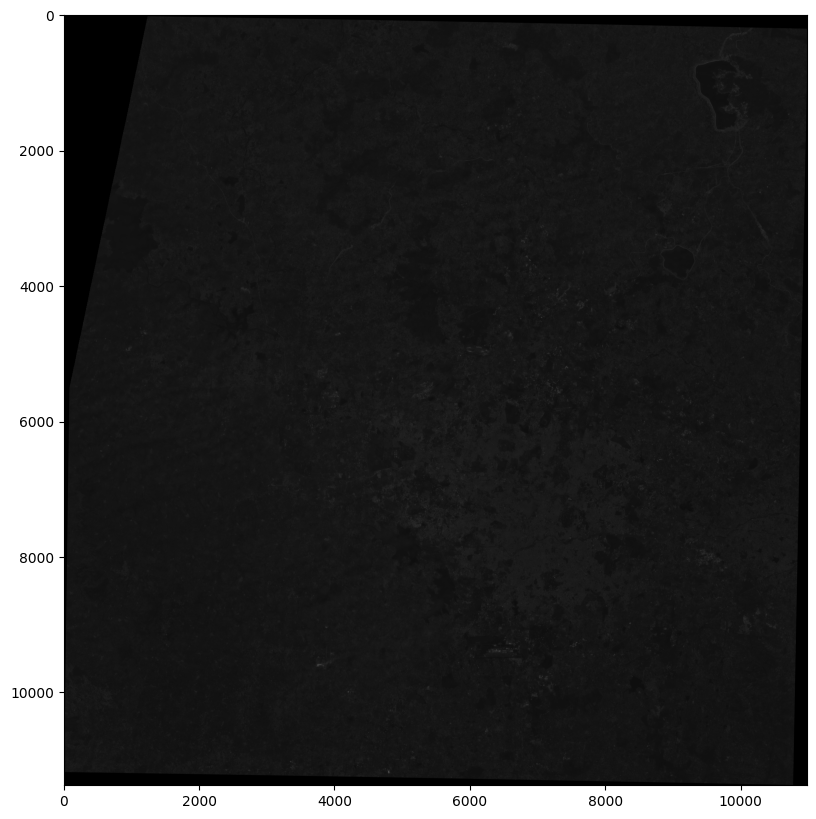

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')

In [47]:
#FETCHING THE BAND

band=ds.GetRasterBand(2)

In [48]:
data=band.ReadAsArray()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

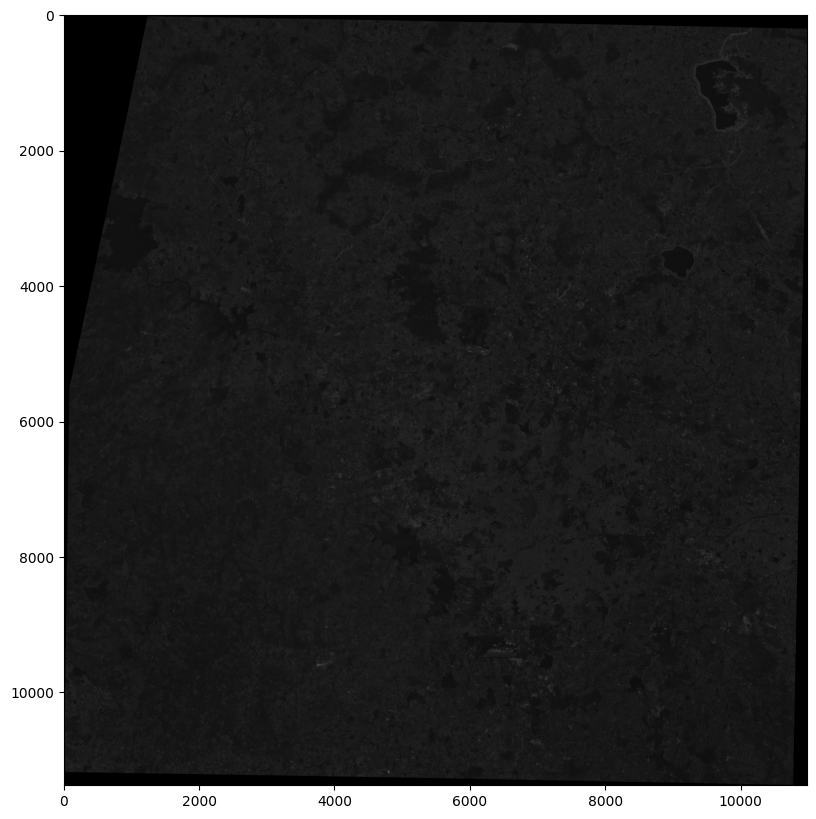

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')

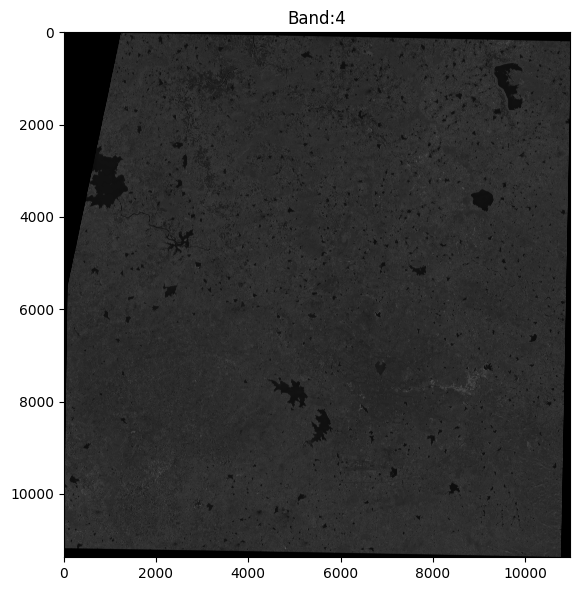

In [50]:
# FOR VISUALISING ALL BANDS TOGETHER

plt.figure(figsize=(15,15))
for i in range(1,ds.RasterCount+1):
  band = ds.GetRasterBand(i)
  plt.subplot(2,2,1)
  plt.title('Band:'+str(i+1))
  plt.imshow(band.ReadAsArray(),cmap='gray')


In [51]:
plt.close()

**VISULISING MULTIBAND RASTER**

**False color composite:**

1.Near infrared (red),green(blue),red(green).{THIS BAND HELPS IN OBSERVING CHANGES IN PLANT HEALTH}
//DARK RED COLOUR SHOWS HEALTHY PLANTS

2.Shortwave infrared (red),near infrared(green),and green (blue){THIS IS USED TO SHOW FLOODS OR NEWLY BURNED LAND}

3.Blue (red),two different shortwave infrared bands(green and blue){WE USE THIS TO DIFFERENTIATE BETWEEEN snow,ice and clouds}

4.Thermal infrared,usually shown in tones of grey to illudtrate temperature.

**STANDARD FALSE COLOR COMPOSITE**

Near infrared (red).red(green),green(blue)

In [69]:
# ds=gdal.Open(file_name)       {FIRST RUN THIS FROM ABOVE CODE}

multi_data = ds.ReadAsArray(band_list=[3,2,1])   #3 represents NIR, band 2 represents red ,band 1 represent green
                                                #we are fetching green colour

In [70]:
multi_data.shape

(3, 11374, 10980)

In [71]:
multi_data = np.transpose(multi_data,axes=(1,2,0)) # for transposing data  from CWH To HWC

In [72]:
multi_data.shape

(11374, 10980, 3)

IT IS TREATING FIRST BAND AS RED SECOND BAND AS GREEN AND THIRD BAND AS BLUE

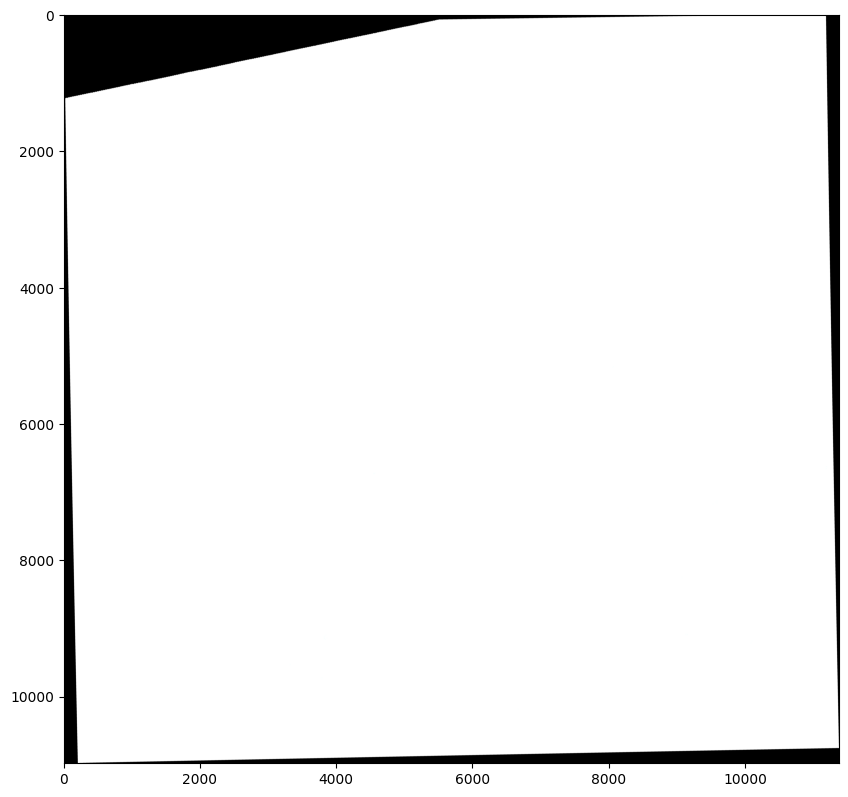

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(multi_data)